# Pima Indians Diabetes Database

Pima Indians Diabetes Database sadrži medicinske prediktorne varijable: broj trudnoća, razinu glukoze, krvni pritisak, debljinu kože, razinu inzulina, BMI, starost, DPF (Diabetes pedigree function) i jednu target varijablu, 'Outcome'. Cilj skupa podataka je predvidjeti ima li pacijent dijabetes na temelju dijagnostičkih mjerenja. Svi pacijenti su žene starije od 21 godine.

## Učitavanje potrebnih biblioteka

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Učitavanje podataka

In [53]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
df.index

RangeIndex(start=0, stop=768, step=1)

Index skupa podataka je ispravno postavljen te ga nije potrebno ručno postavljati.

In [55]:
df.shape

(768, 9)

## Tipovi podataka

In [56]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Svi podatci su numerički što je i očekivano s obzirom na varijable koje se nalaze u skupu podataka. Nije potrebno mijenjati tipove podataka.

## Deskriptivna statistika

In [57]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


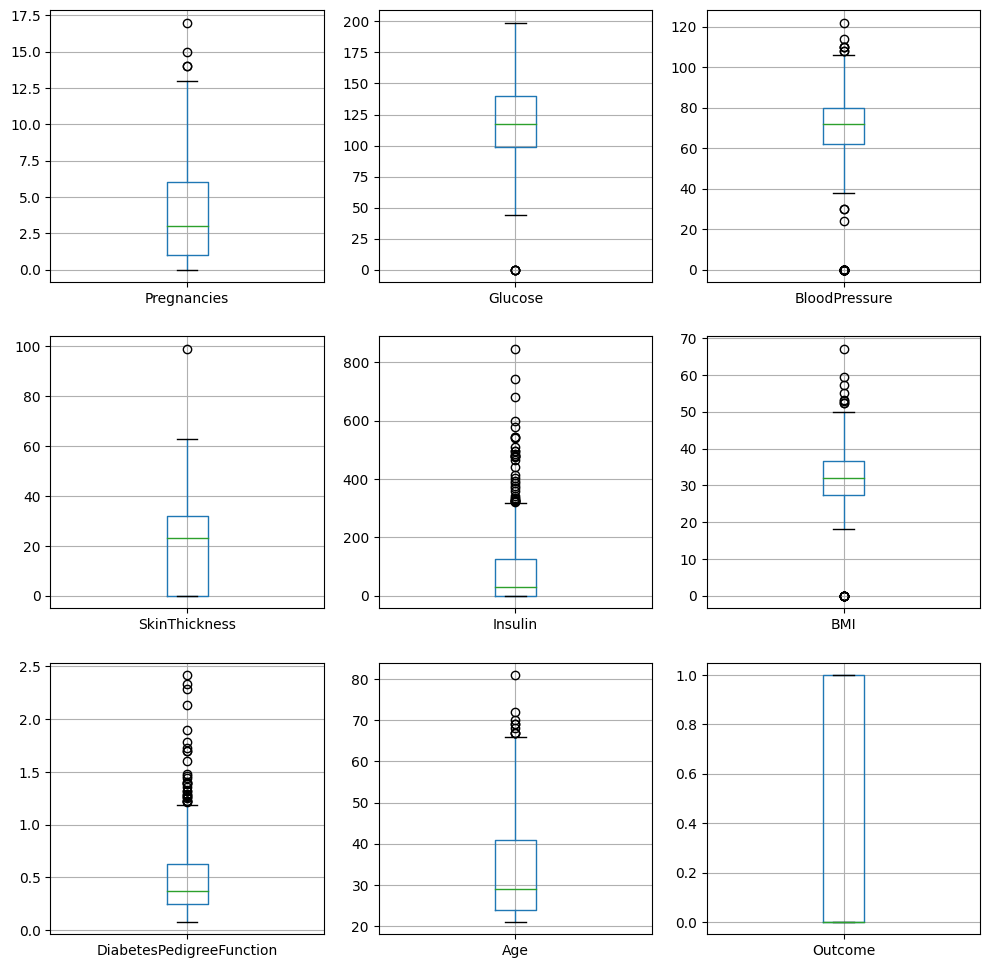

In [59]:
plt.figure(figsize=(12,12))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

## Stršeće vrijednosti

## Nedostajuće vrijednosti

In [60]:
# Nedostajuće vrijednost

nan_cnt = df.isnull().sum(axis=0)
nan_cnt.value_counts

<bound method IndexOpsMixin.value_counts of Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64>

In [61]:
# Vrijednosti jednake nuli

zero_cnt = df.eq(0).sum(axis=0)
zero_cnt.value_counts

<bound method IndexOpsMixin.value_counts of Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64>

In [62]:
# Postotak vrijednonsti jednakih nuli

df.eq(0).sum(axis=0) / len(df) * 100

Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

Ovaj skup podataka ne sadrži nedostajuće vrijednosti tipa NaN, no postoje vrijednosti koje su jednake nuli. Potrebno je nad tim kolonama odraditi imputaciju podataka. Različite se metode koriste ovisno o tome jesu li podaci numerički ili kategoričiki. Ukoliko su podaci numerički, podaci se mogu imputirati tako što se umjesto nedostajuće vrijednosti stavi srednja vrijednost, medijan ili mod. Korištenje medijana i moda ima prednost u tome što na njega ne utječu outlieri koliko na srednju vrijednost. S druge strane, ove metode ne uzimaju u obzir koreliranost podataka. Također je moguće koristit kNN metodu gdje se nedostajeća vrijednost zamijeni ovisno o primjerima koji su najbliži primjeru koji je u pitanju. Ova je metoda posebice korisna kada kolona sadrži jako velik broj nedostajućih vrijednosti jer bi zamjena nedostajućih vrijednosti u takvoj koloni srednjom vrijednošću ili medijanom znatno utjecala na distribuciju te kolone. Moguće je i u potpunosti zanemarati neku od kolona ukoliko je broj nedostajućih vrijednosti prevelik.

Kod kategoričkih varijabli je češće korištenje moda (najčešće vrijednsoti) kao zamjenu za nedostajuće vrijednosti, no takve varijable ne postoje u ovom skupu podataka.

Kolonama 'Glucose', 'BloodPressure', 'BMI', te 'SkinThickness' ću vrijednosti 0 zamijeniti medijanom, a koloni 'Insulin' kNN metodom jer je toj koloni čak 48.7% vrijednosti 0.

### Glucose

In [64]:
glucose_median = df['Glucose'].median()
glucose_median

117.0

In [65]:
df.loc[df['Glucose'] == 0, 'Glucose'] = glucose_median

### BloodPressure

In [66]:
bloodpressure_median = df['BloodPressure'].median()
bloodpressure_median

72.0

In [67]:
df.loc[df['BloodPressure'] == 0, 'BloodPressure'] = bloodpressure_median

### BMI

In [68]:
bmi_median = df['BMI'].median()
bmi_median

32.0

In [69]:
df.loc[df['BMI'] == 0, 'BMI'] = bmi_median

### SkinThickness

In [70]:
skinthickenss_median = df['SkinThickness'].median()
skinthickenss_median

23.0

In [71]:
df.loc[df['SkinThickness'] == 0, 'SkinThickness'] = skinthickenss_median

### Insulin

In [73]:
from sklearn.impute import KNNImputer

df.loc[df['Insulin'] == 0, 'Insulin'] = np.nan

imputer = KNNImputer(n_neighbors = 3)
df = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)

In [74]:
# Postotak vrijednonsti jednakih nuli

df.eq(0).sum(axis=0) / len(df) * 100

Pregnancies                 14.453125
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness                0.000000
Insulin                      0.000000
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64

## Vizualizacija i odabir značajki

## Podjela skupa podataka na za fazu treniranja

In [21]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val =  train_test_split(df_train, test_size=0.2, random_state=42)

In [22]:
X_train = df_train.drop(['Outcome'], axis=1)
y_train = df_train['Outcome']

X_val = df_val.drop(['Outcome'], axis=1)
y_val = df_val['Outcome']

X_test = df_test.drop(['Outcome'], axis=1)
y_test = df_test['Outcome']

## Treniranje modela